## 三 布局格式

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
# plt.rcParams['font.sans-serif'] = ['SimHei']   #用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False   #用来正常显示负号
print(matplotlib.matplotlib_fname())
print(matplotlib.get_cachedir())

/Users/shanjh/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc
/Users/shanjh/.matplotlib


## 一、子图

### 1. 使用 `plt.subplots` 绘制均匀状态下的子图

返回元素分别是画布和子图构成的列表，第一个数字为行，第二个为列

`figsize` 参数可以指定整个画布的大小

`sharex` 和 `sharey` 分别表示是否共享横轴和纵轴刻度

`tight_layout` 函数可以调整子图的相对大小使字符不会重叠

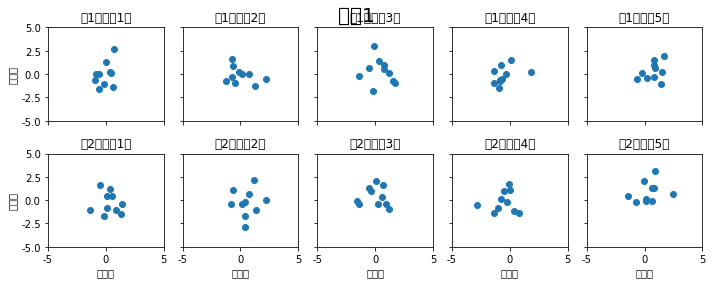

In [23]:
fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('样例1', size=20)
for i in range(2):
    for j in range(5):
        axs[i][j].scatter(np.random.randn(10), np.random.randn(10))
        axs[i][j].set_title('第%d行，第%d列'%(i+1,j+1))
        axs[i][j].set_xlim(-5,5)
        axs[i][j].set_ylim(-5,5)
        if i==1: axs[i][j].set_xlabel('横坐标')
        if j==0: axs[i][j].set_ylabel('纵坐标')
fig.tight_layout()

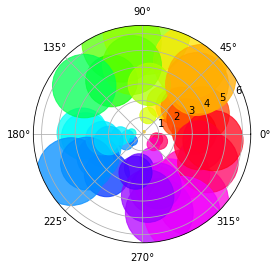

In [24]:
N=50
r=2*np.pi*np.random.rand(N)
theta=2*np.pi*np.random.rand(N)
area=200*r**2
colors=theta

plt.subplot(projection='polar')
plt.scatter(theta,r,c=colors,s=area,cmap='hsv',alpha=0.75)


### 2. 使用 `GridSpec` 绘制非均匀子图

所谓非均匀包含两层含义，第一是指图的比例大小不同但没有跨行或跨列，第二是指图为跨列或跨行状态

利用 `add_gridspec` 可以指定相对宽度比例 `width_ratios` 和相对高度比例参数 `height_ratios`

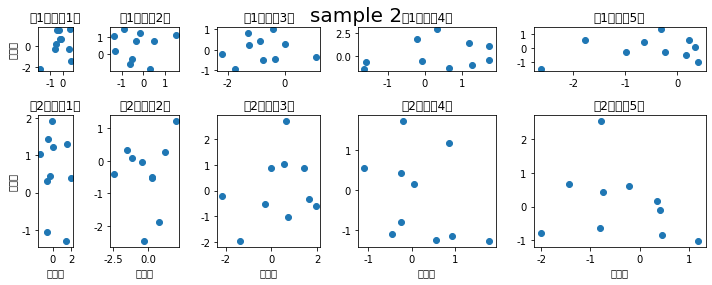

In [25]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=5,width_ratios=[1,2,3,4,5], height_ratios=[1,3])
fig.suptitle('sample 2', size=20)
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(spec[i, j])
        ax.scatter(np.random.randn(10), np.random.randn(10))
        ax.set_title('第%d行，第%d列'%(i+1,j+1))
        if i==1: ax.set_xlabel('横坐标')
        if j==0: ax.set_ylabel('纵坐标')
fig.tight_layout()

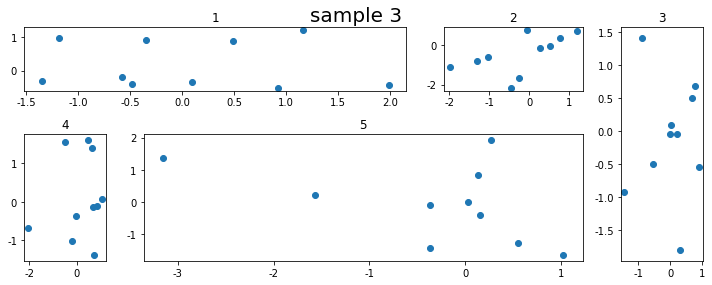

In [27]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=6, width_ratios=[2,2.5,3,1,1.5,2], height_ratios=[1,2])
fig.suptitle('sample 3', size=20)
# sub1
ax = fig.add_subplot(spec[0, :3])
ax.scatter(np.random.randn(10), np.random.randn(10))
ax.set_title('1')
# sub2
ax = fig.add_subplot(spec[0, 3:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
ax.set_title('2')
# sub3
ax = fig.add_subplot(spec[:, 5])
ax.scatter(np.random.randn(10), np.random.randn(10))
ax.set_title('3')
# sub4
ax = fig.add_subplot(spec[1, 0])
ax.scatter(np.random.randn(10), np.random.randn(10))
ax.set_title('4')
# sub5
ax = fig.add_subplot(spec[1, 1:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
ax.set_title('5')
fig.tight_layout()

## 二、子图上的方法

在 `ax` 对象上定义了和 `plt` 类似的图形绘制函数，常用的有： `plot, hist, scatter, bar, barh, pie`

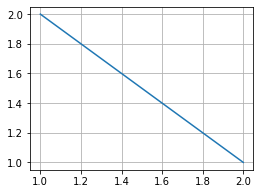

In [32]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot([1,2],[2,1])
ax.grid(True)

(array([  7.,  22.,  77., 180., 209., 233., 167.,  86.,  17.,   2.]),
 array([-3.14999034, -2.51301503, -1.87603971, -1.2390644 , -0.60208908,
         0.03488623,  0.67186155,  1.30883687,  1.94581218,  2.5827875 ,
         3.21976281]),
 <a list of 10 Patch objects>)

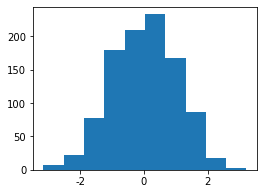

In [30]:
fig, ax = plt.subplots(figsize=(4,3))
ax.hist(np.random.randn(1000))

使用 `set_xscale, set_title, set_xlabel` 分别可以设置坐标轴的规度（指对数坐标等）、标题、轴名

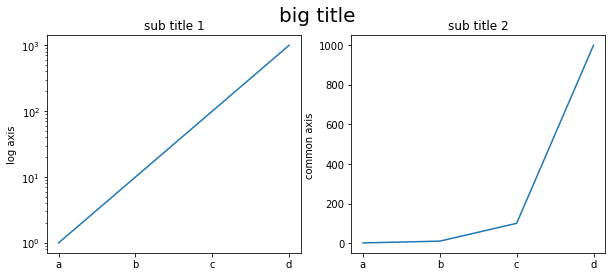

In [36]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
fig.suptitle('big title',size=20)
for i in range(2):
    axes[i].plot(list('abcd'),[10**i for i in range(4)])
    if i%2==0:
        axes[i].set_yscale('log')
        axes[i].set_title('sub title 1')
        axes[i].set_ylabel('log axis')
    else:
        axes[i].set_title('sub title 2')
        axes[i].set_ylabel('common axis ')

与一般的 `plt` 方法类似， `legend, annotate, arrow, text` 对象也可以进行相应的绘制

Text(0.8, 0.2, 'This is a the midpoint')

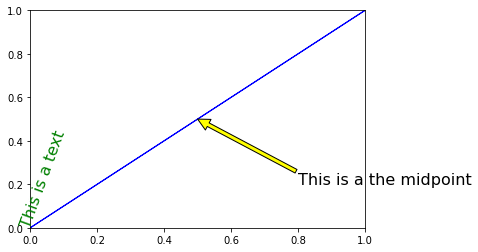

In [40]:
fig,axes=plt.subplots(figsize=(10,10))
axes.arrow(0,0,1,1,head_width=0.03,head_length=0.05,facecolor='red',edgecolor='blue')

axes.text(x=0,y=0,s='This is a text', fontsize=16,rotation=70,rotation_mode='anchor',color='green')
axes.annotate('This is a the midpoint',xy=(0.5,0.5),xytext=(0.8,0.2),arrowprops=dict(facecolor='yellow',edgecolor='black'),fontsize=16)

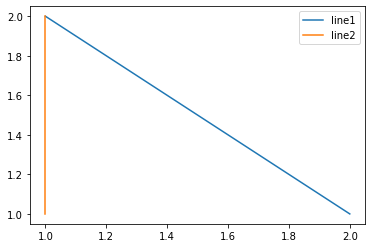

In [42]:
fig,axes=plt.subplots()
axes.plot([1,2],[2,1],label='line1')
axes.plot([1,1],[1,2],label='line2')
axes.legend(loc=1)

其中，图例的 `loc` 参数如下：

|  string   | code  |
|  ----  | ----  |
| best  | 0 |
| upper right  | 1 |
| upper left  | 2 |
| lower left  | 3 |
| lower right  | 4 |
| right  | 5 |
| center left  | 6 |
| center right  | 7 |
| lower center  | 8 |
| upper center  | 9 |
| center  | 10 |

## 作业

### 1. 墨尔本1981年至1990年的每月温度情况

In [2]:
import pandas as pd
ex1 = pd.read_csv('https://gitee.com/datawhalechina/fantastic-matplotlib/raw/main/data/layout_ex1.csv')
ex1.head()

,Time,Temperature
0,1981-01,17.712903
1,1981-02,17.678571
2,1981-03,13.500000
3,1981-04,12.356667
4,1981-05,9.490323


- 请利用数据，画出如下的图：

<img src="https://s1.ax1x.com/2020/11/01/BwvCse.png" width="800" align="bottom" />

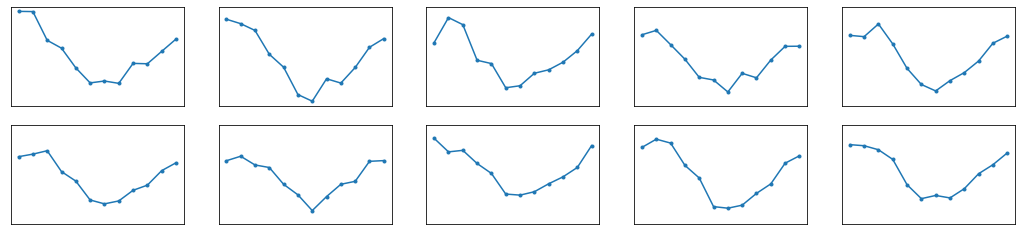

In [78]:
fig,ax=plt.subplots(2,5,sharex=True,sharey=True,figsize=(18,4))
for year in range(int(len(ex1)/12)):
    # print("row",row,"year",year)
    # print([i in range(12)])
    # print(ex1['Temperature'][year*12:(year+1)*12])
    y=np.array(ex1['Temperature'][year*12:(year+1)*12])
    y=y.reshape(1,12)
    # print(y.shape)
    ax[int(year/5),year%5].plot([i for i in range(12)],y[0],'.-')
    ax[int(year/5),year%5].get_xaxis().set_visible(False)
    ax[int(year/5),year%5].get_yaxis().set_visible(False)


### 2. 画出数据的散点图和边际分布

- 用 `np.random.randn(2, 150)` 生成一组二维数据，使用两种非均匀子图的分割方法，做出该数据对应的散点图和边际分布图

<img src="https://s1.ax1x.com/2020/11/01/B0pEnS.png" width="400" height="400" align="bottom" />

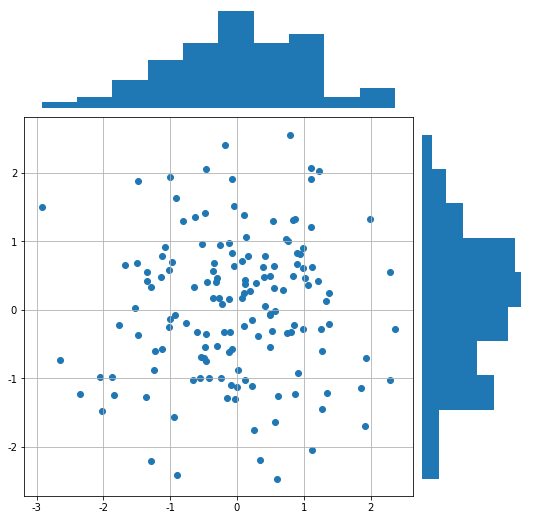

In [95]:
data=np.random.randn(2,150)
# fig,ax=plt.subplots()
# ax.scatter(data[0],data[1])
fig=plt.figure(figsize=(9,9))
spec=fig.add_gridspec(9,9,width_ratios=[1 for i in range(9)],height_ratios=[1 for i in range(9)])
ax1=fig.add_subplot(spec[2:9,0:7])
ax2=fig.add_subplot(spec[0:2,0:7],sharex=ax1)
ax3=fig.add_subplot(spec[2:9,7:],sharey=ax1)

ax1.scatter(data[0],data[1])
# ax1.get_xaxis().set_visible(False)
# ax1.get_yaxis().set_visible(False)

ax1.grid(True)

ax2.hist(data[0,:])
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)
ax3.hist(data[1,],orientation='horizontal')
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
for spine in ax3.spines.values():
    spine.set_visible(False)
